# EDA для Disease Risk Prediction Dataset

## Цель анализа
Провести разведочный анализ медицинского датасета для оценки:
- Качества данных и пригодности для дальнейшего анализа
- Выявления необходимых трансформаций в ETL-пайплайне
- Понимания распределений и взаимосвязей признаков

## Метрики 
Оценить качество данных необходимо опираясь на слующие метрики:
- Completeness (полнота данных)
- Uniqueness (уникальность) 
- Структурная целостность
- Семантическая валидность

## Используемые инструменты
- pandas для анализа
- numpy для вычислений
- Встроенные визуализации pandas

### 0. Импорт необходимых библиотек и настройка отображения

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# настройки отображения
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

### 1. Первичная оценка DataSet: размеры и информация о данных - структурный анализ

In [3]:
# загружаем сырые данные для оценки
df = pd.read_csv('data/raw/disease_risk_dataset.csv') 

# смотрим на данные 
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nПервые 5 строк:")
display(df.head())
print("\nИнформация о данных:")
df.info()

Размер датасета: 4000 строк, 15 столбцов

Первые 5 строк:


,Patient_ID,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Glucose_Level,Family_History,Genetic_Risk_Score,Previous_Diagnosis,Disease_Risk
0,P100000,69,Female,27.8,Never,NaN,Low,92,117,297,156,Yes,0.52,NaN,No
1,P100001,32,Female,32.0,Never,Moderate,Moderate,149,77,279,163,Yes,0.50,NaN,Yes
2,P100002,89,Male,24.2,Former,High,High,124,82,189,139,Yes,0.37,Diagnosed,No
3,P100003,78,Male,23.8,Never,NaN,Moderate,118,81,159,169,No,0.55,NaN,No
4,P100004,38,Male,29.8,Never,Moderate,Moderate,164,63,213,97,Yes,0.59,Pre-disease,No



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                4000 non-null   object 
 1   Age                       4000 non-null   int64  
 2   Gender                    4000 non-null   object 
 3   BMI                       4000 non-null   float64
 4   Smoking_Status            4000 non-null   object 
 5   Alcohol_Consumption       2361 non-null   object 
 6   Physical_Activity_Level   4000 non-null   object 
 7   Blood_Pressure_Systolic   4000 non-null   int64  
 8   Blood_Pressure_Diastolic  4000 non-null   int64  
 9   Cholesterol_Level         4000 non-null   int64  
 10  Glucose_Level             4000 non-null   int64  
 11  Family_History            4000 non-null   object 
 12  Genetic_Risk_Score        4000 non-null   float64
 13  Previous_Diagnosis        1973 non-null  

### 2. Уникальность идентификаторов 

In [39]:
print(f"Уникальных Patient_ID: {df['Patient_ID'].nunique()} из {len(df)}")
print(f"Дубликатов Patient_ID: {df['Patient_ID'].duplicated().sum()}")
print(f"Полностью дублирующихся строк: {df.duplicated().sum()}")

Уникальных Patient_ID: 4000 из 4000
Дубликатов Patient_ID: 0
Полностью дублирующихся строк: 0


### 3. Логическая целостность числовых значений

In [42]:
# 1. Проверка возрастного диапазона
print(f"\n1. Возраст: {df['Age'].min()}-{df['Age'].max()} лет")
print(f"   Аномальные значения (<0 или >120): {((df['Age'] < 0) | (df['Age'] > 120)).sum()}")

# 2. Проверка соотношения давлений
pressure_issue = (df['Blood_Pressure_Systolic'] <= df['Blood_Pressure_Diastolic']).sum()
print(f"\n2. Некорректное соотношение давлений: {pressure_issue} записей\n")

# 3. Проверка неотрицательных значений
numeric_cols = ['BMI', 'Cholesterol_Level', 'Glucose_Level', 'Genetic_Risk_Score']
print("3. Проверка неотрицательных значений")
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    print(f"\t Для <{col}> отрицательных значений: {negative_count}")

# 4. Уникальные значения в потенциальных категориальных колонках
print("\n4. УНИКАЛЬНЫЕ ЗНАЧЕНИЯ")
categorical_cols = [
    "Gender",
    "Smoking_Status",
    "Alcohol_Consumption",
    "Physical_Activity_Level",
    "Family_History",
    "Previous_Diagnosis",
    "Disease_Risk",
]
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
    print(f"Пропусков: {df[col].isnull().sum()}\n")


1. Возраст: 18-89 лет
   Аномальные значения (<0 или >120): 0

2. Некорректное соотношение давлений: 340 записей

3. Проверка неотрицательных значений
	 Для <BMI> отрицательных значений: 0
	 Для <Cholesterol_Level> отрицательных значений: 0
	 Для <Glucose_Level> отрицательных значений: 0
	 Для <Genetic_Risk_Score> отрицательных значений: 0

4. УНИКАЛЬНЫЕ ЗНАЧЕНИЯ
Gender: ['Female' 'Male' 'Other']
Пропусков: 0

Smoking_Status: ['Never' 'Former' 'Current']
Пропусков: 0

Alcohol_Consumption: [nan 'Moderate' 'High']
Пропусков: 1639

Physical_Activity_Level: ['Low' 'Moderate' 'High']
Пропусков: 0

Family_History: ['Yes' 'No']
Пропусков: 0

Previous_Diagnosis: [nan 'Diagnosed' 'Pre-disease']
Пропусков: 2027

Disease_Risk: ['No' 'Yes']
Пропусков: 0



### 4. Полнота данных (Completeness)

ПОЛНОТА ДАННЫХ


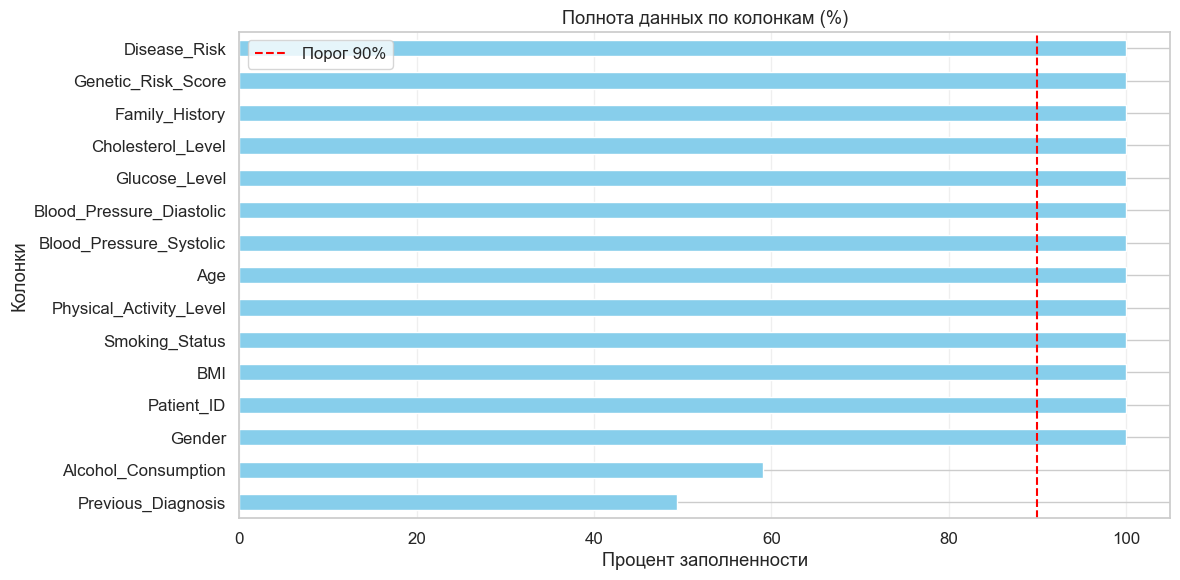

In [31]:
print("ПОЛНОТА ДАННЫХ")

# Визуализация полноты данных
completeness = (1 - df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(12, 6))
completeness.sort_values().plot(kind='barh', color='skyblue')
plt.axvline(x=90, color='red', linestyle='--', label='Порог 90%')
plt.title('Полнота данных по колонкам (%)')
plt.xlabel('Процент заполненности')
plt.ylabel('Колонки')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 5. Предварительные выводы по качеству данных

#### Метрики качества

* Полнота данных (Completeness): 85.3%
* Уникальность идентификаторов (Uniqueness): 100%
* Выявленные особенности данных

Обнаружено 340 записей с аномальным соотношением артериального давления (диастолическое давление выше систолического). В медицинских данных это может соответствовать реальным патологическим случаям.

#### Значительное количество пропусков в колонках:
- Alcohol_Consumption: 1639 пропусков (41% данных)
- Previous_Diagnosis: 2027 пропусков (51% данных)
    
#### Рекомендации:
Аномалии артериального давления следует сохранить как возможные медицинские случаи

## 6. Анализ выбросов по методу IQR для числовых данных

АНАЛИЗ ВЫБРОСОВ ПО МЕТОДУ IQR:

Age:
  Границы: [-16.5, 123.5]
  Выбросов: 0 (0.0%)

BMI:
  Границы: [13.4, 40.6]
  Выбросов: 25 (0.6%)

Blood_Pressure_Systolic:
  Границы: [47.0, 223.0]
  Выбросов: 0 (0.0%)

Blood_Pressure_Diastolic:
  Границы: [27.5, 151.5]
  Выбросов: 0 (0.0%)

Cholesterol_Level:
  Границы: [74.5, 374.5]
  Выбросов: 0 (0.0%)

Glucose_Level:
  Границы: [-0.5, 267.5]
  Выбросов: 0 (0.0%)

Genetic_Risk_Score:
  Границы: [0.2, 0.8]
  Выбросов: 23 (0.6%)


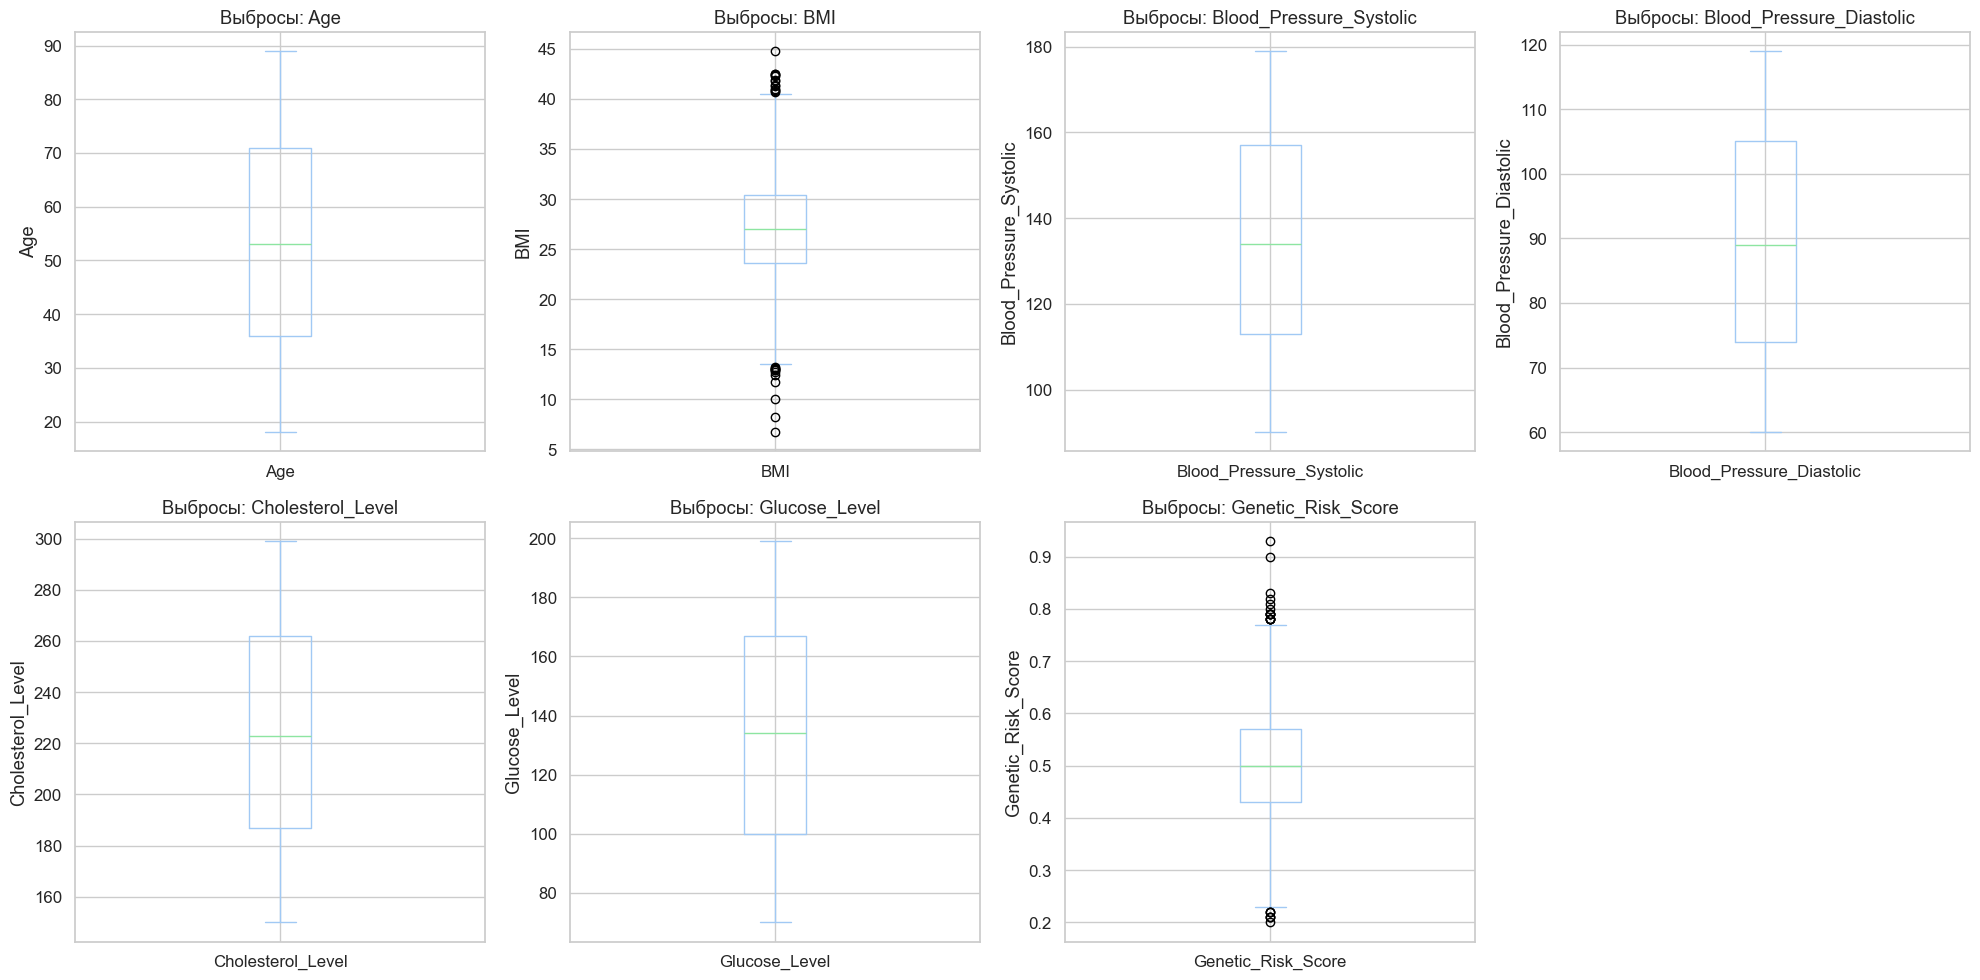

In [ ]:
numeric_cols = ['Age', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 
                'Cholesterol_Level', 'Glucose_Level', 'Genetic_Risk_Score']

print("АНАЛИЗ ВЫБРОСОВ ПО МЕТОДУ IQR:")

outliers_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    outliers_summary[col] = outlier_percent
    
    print(f"\n{col}:")
    print(f"  Границы: [{lower_bound:.1f}, {upper_bound:.1f}]")
    print(f"  Выбросов: {outlier_count} ({outlier_percent:.1f}%)")

# визуализация
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    df[col].plot.box(ax=axes[i])
    axes[i].set_title(f'Выбросы: {col}')
    axes[i].set_ylabel(col)

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

## 7. Распределение числовых показателей

In [12]:
print("Распределение числовых показателей:")
numeric_cols = ['Age', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 
                'Cholesterol_Level', 'Glucose_Level', 'Genetic_Risk_Score']
print(df[numeric_cols].describe())

Распределение числовых показателей:
              Age          BMI  Blood_Pressure_Systolic  \
count  4000.00000  4000.000000               4000.00000   
mean     53.22350    27.008025                134.64150   
std      20.63234     5.020856                 25.92738   
min      18.00000     6.700000                 90.00000   
25%      36.00000    23.600000                113.00000   
50%      53.00000    27.000000                134.00000   
75%      71.00000    30.400000                157.00000   
max      89.00000    44.800000                179.00000   

       Blood_Pressure_Diastolic  Cholesterol_Level  Glucose_Level  \
count               4000.000000        4000.000000    4000.000000   
mean                  89.529500         224.404500     133.946250   
std                   17.455996          43.255458      38.027857   
min                   60.000000         150.000000      70.000000   
25%                   74.000000         187.000000     100.000000   
50%               

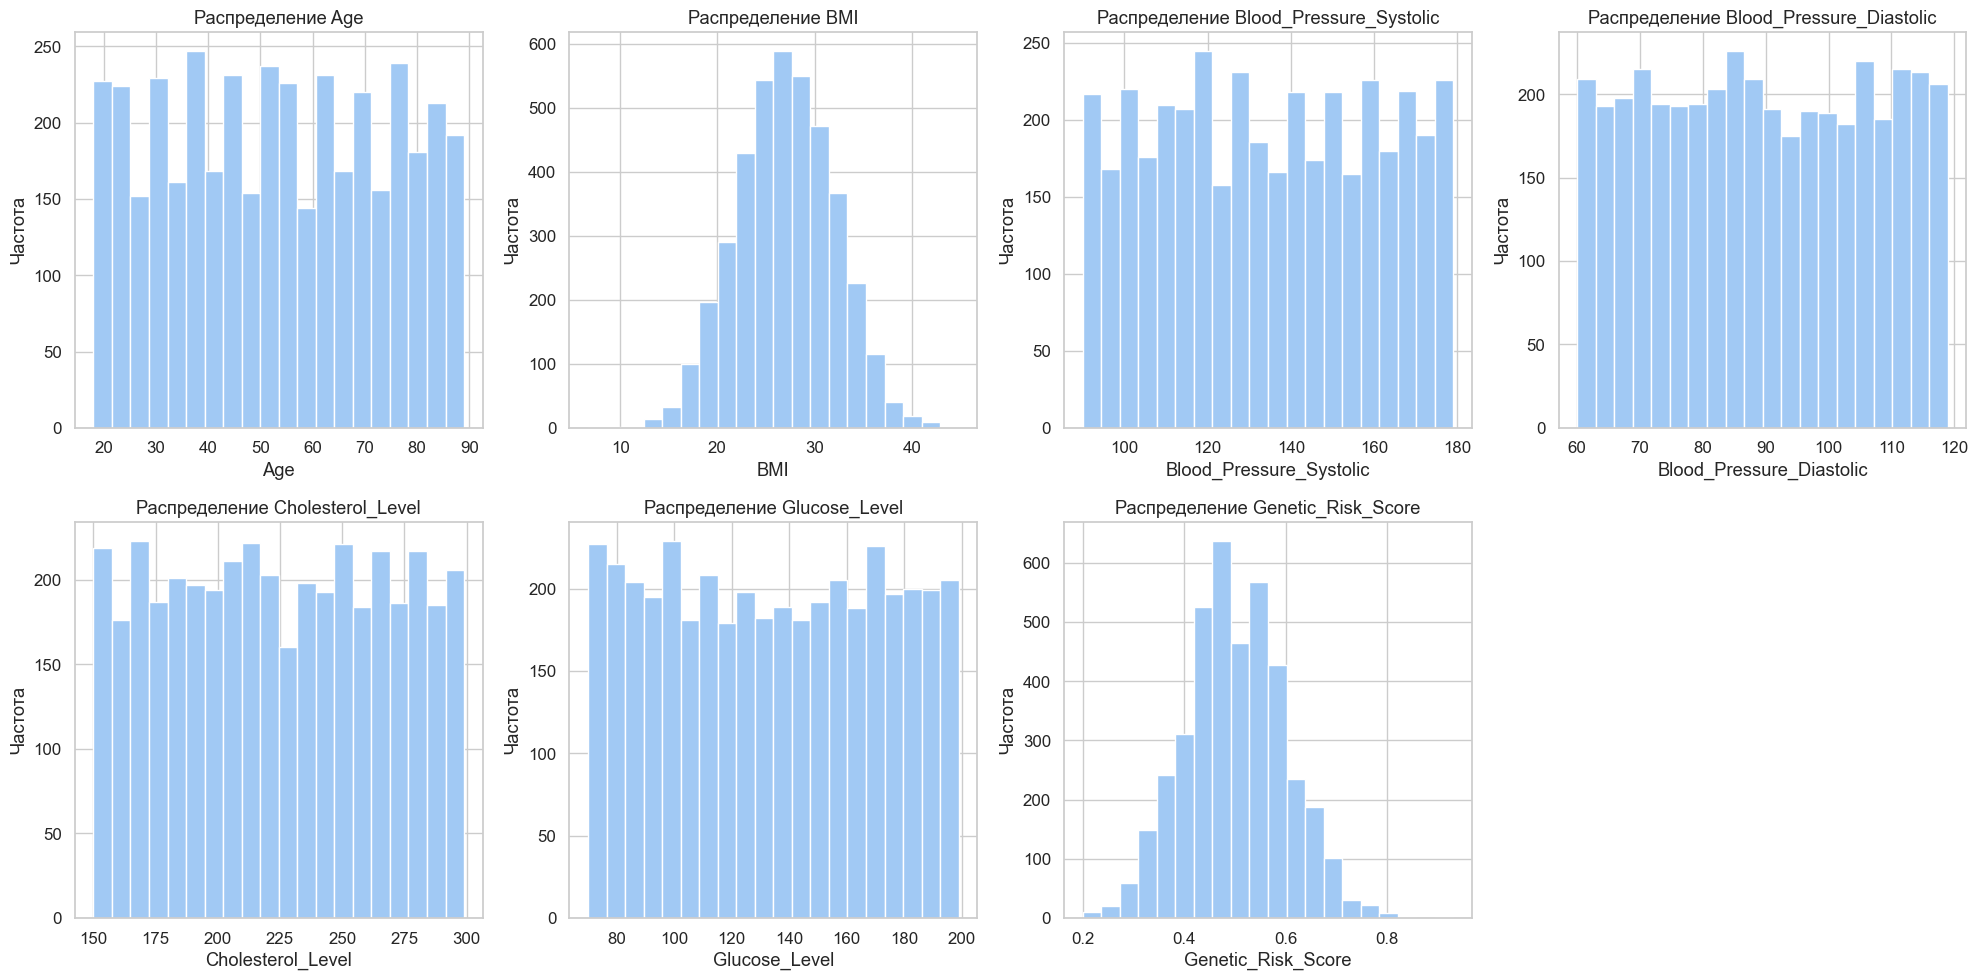

In [13]:
# Гистограммы распределения числовых показателей
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[i], bins=20)
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

# Скрываем лишний subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

## 8. Анализ взаимосвязей

Матрица корреляций


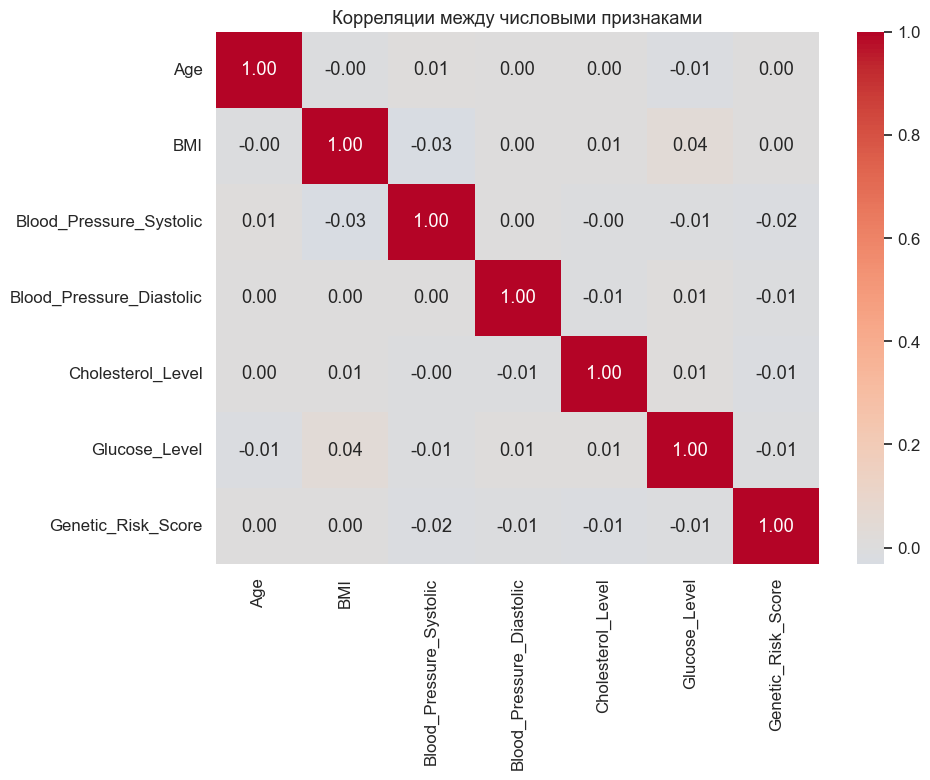

In [12]:
print("Матрица корреляций")
columns = [
    'Age',
    'BMI',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Cholesterol_Level',
    'Glucose_Level',
    'Genetic_Risk_Score'
]

# Compute correlation matrix
corr_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляции между числовыми признаками')
plt.tight_layout()
plt.show()

In [14]:
print("\nКРОСС-ТАБЛИЦЫ:")

print("Курение vs Риск заболевания:")
smoking_risk = pd.crosstab(df['Smoking_Status'], df['Disease_Risk'], normalize='index') * 100
print(smoking_risk.round(1))

print("\nФизическая активность vs Риск заболевания:")
activity_risk = pd.crosstab(df['Physical_Activity_Level'], df['Disease_Risk'], normalize='index') * 100  
print(activity_risk.round(1))


КРОСС-ТАБЛИЦЫ:
Курение vs Риск заболевания:
Disease_Risk      No   Yes
Smoking_Status            
Current         59.7  40.3
Former          91.5   8.5
Never           92.1   7.9

Физическая активность vs Риск заболевания:
Disease_Risk               No   Yes
Physical_Activity_Level            
High                     87.7  12.3
Low                      77.4  22.6
Moderate                 89.5  10.5


### Cравнение распределений числовых признаков между группами риска заболевания

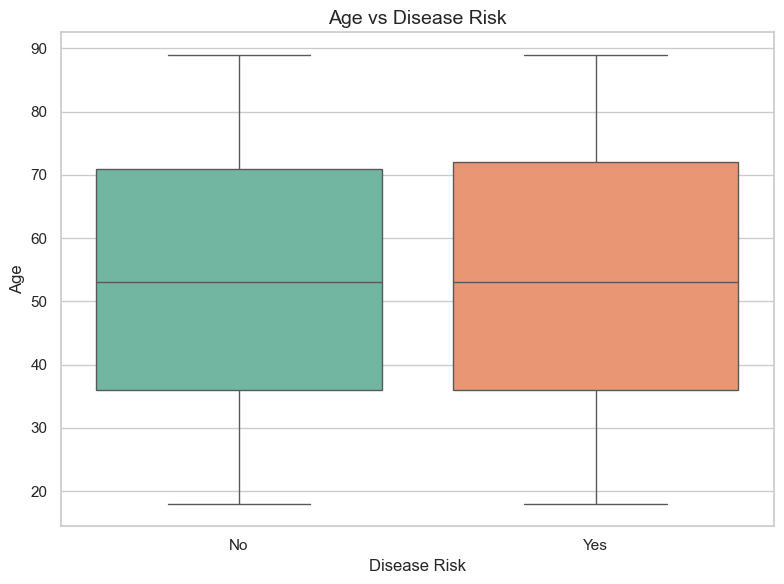

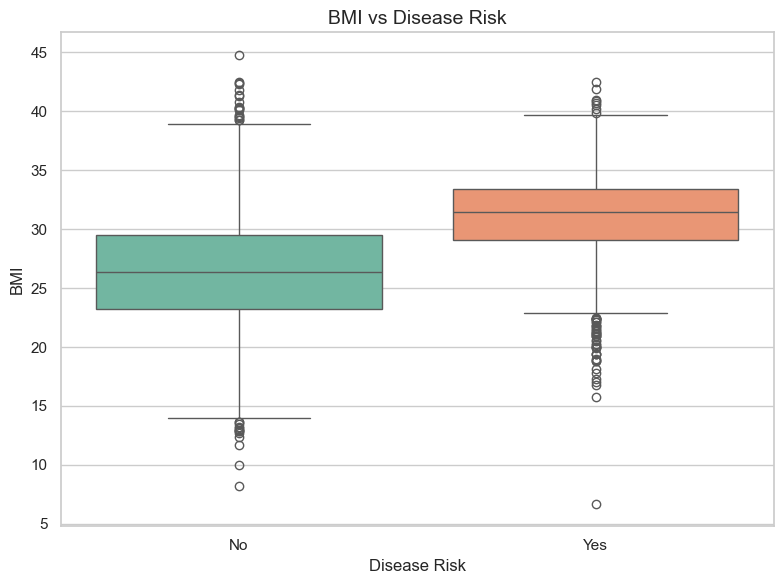

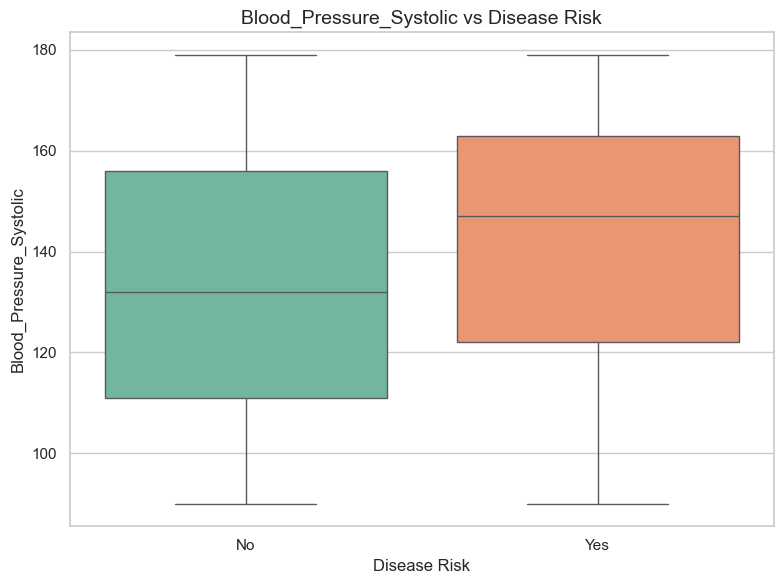

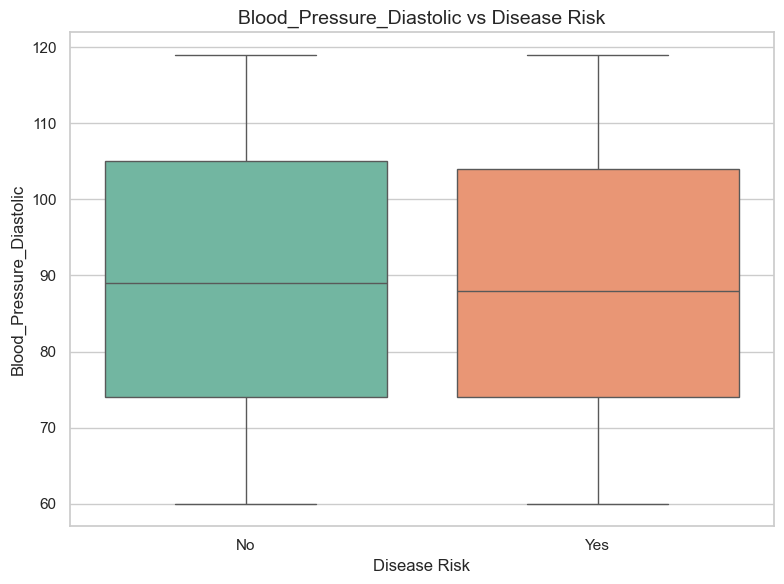

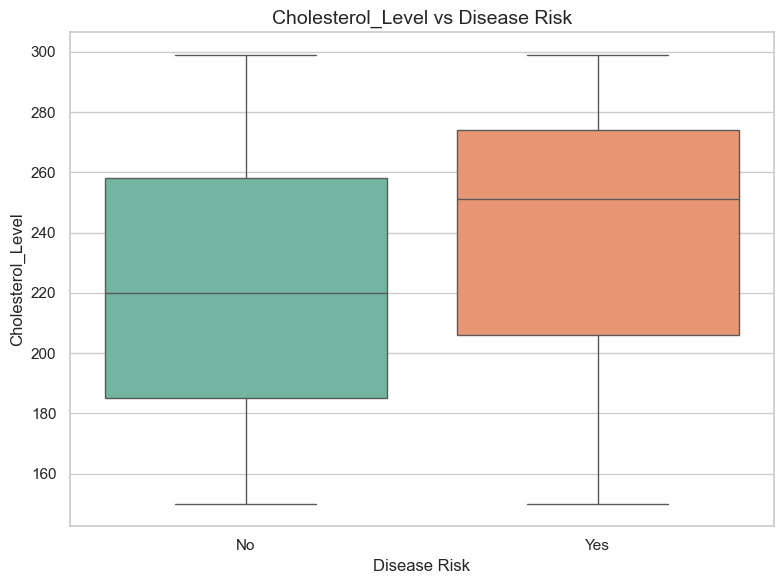

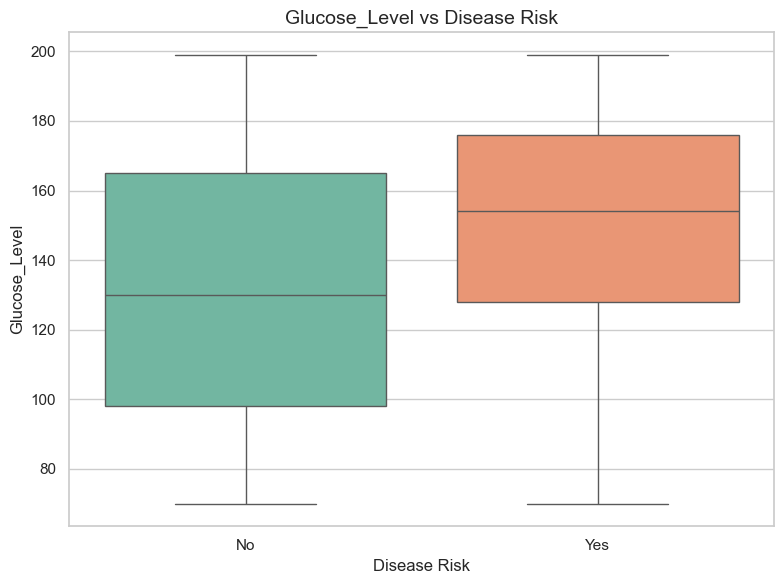

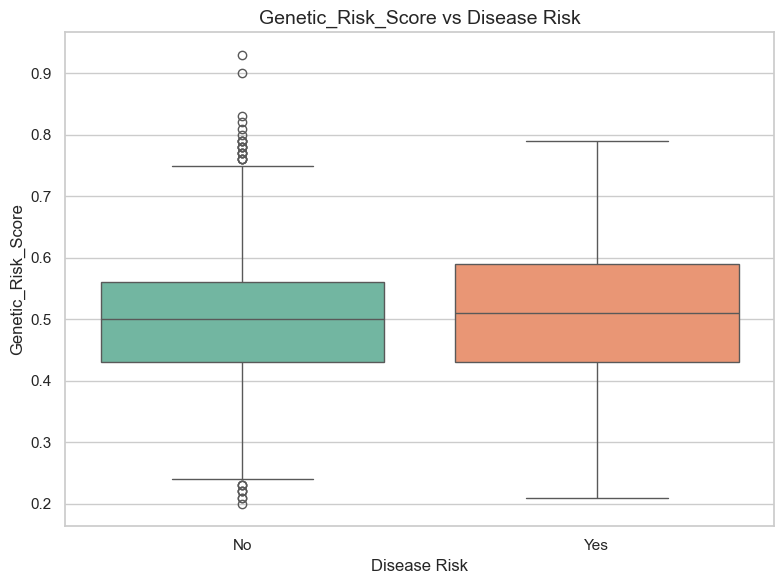

In [16]:
numeric_columns = [
    "Age",
    "BMI", 
    "Blood_Pressure_Systolic",
    "Blood_Pressure_Diastolic",
    "Cholesterol_Level",
    "Glucose_Level",
    "Genetic_Risk_Score"
]

sns.set(style="whitegrid")

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Disease_Risk', y=col, data=df, hue='Disease_Risk', palette='Set2', legend=False)
    plt.title(f'{col} vs Disease Risk', fontsize=14)
    plt.xlabel('Disease Risk', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

"Gender", "Smoking_Status", "Alcohol_Consumption", "Physical_Activity_Level" и "Previous_Diagnosis" следует преобразовать в категориальных тип данных (так как есть только 3 уникальных значения), а "Family_History" и "Disease_Risk" можно преобразовать в булевый тип данных (так как есть только 2 уникальных значения "YES" и "NO")

### Анализ аномальных давлений:

In [22]:
from IPython.display import display, HTML

# Создаем сводную таблицу
summary_data = {
    'Показатель': ['Количество записей', 'Средний возраст', 'Средний BMI', 
                   'Средний холестерин', 'Средняя глюкоза', 'Риск заболевания (Yes)',
                   'Есть предыдущий диагноз'],
    'Нормальное давление': [
        f"{len(df[~df['BP_Anomaly']])}",
        f"{df[~df['BP_Anomaly']]['Age'].mean():.1f}",
        f"{df[~df['BP_Anomaly']]['BMI'].mean():.1f}", 
        f"{df[~df['BP_Anomaly']]['Cholesterol_Level'].mean():.1f}",
        f"{df[~df['BP_Anomaly']]['Glucose_Level'].mean():.1f}",
        f"{(df[~df['BP_Anomaly']]['Disease_Risk'] == 'Yes').mean()*100:.1f}%",
        f"{(df[~df['BP_Anomaly']]['Previous_Diagnosis'].notna()).mean()*100:.1f}%"
    ],
    'Аномальное давление': [
        f"{len(df[df['BP_Anomaly']])}",
        f"{df[df['BP_Anomaly']]['Age'].mean():.1f}",
        f"{df[df['BP_Anomaly']]['BMI'].mean():.1f}",
        f"{df[df['BP_Anomaly']]['Cholesterol_Level'].mean():.1f}",
        f"{df[df['BP_Anomaly']]['Glucose_Level'].mean():.1f}",
        f"{(df[df['BP_Anomaly']]['Disease_Risk'] == 'Yes').mean()*100:.1f}%",
        f"{(df[df['BP_Anomaly']]['Previous_Diagnosis'].notna()).mean()*100:.1f}%"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(HTML(summary_df.to_html(index=False, classes='table table-striped')))

Показатель,Нормальное давление,Аномальное давление
Количество записей,3660,340
Средний возраст,53.3,52.8
Средний BMI,27.0,27.1
Средний холестерин,224.6,222.1
Средняя глюкоза,133.7,137.0
Риск заболевания (Yes),15.1%,7.9%
Есть предыдущий диагноз,49.5%,47.4%
